In [18]:
from helpers import *
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [2]:
work_dfs = {}
for file in glob("./cultivos/*.csv"):
    df = pd.read_csv(file)
    filename= Path(file).stem
    work_dfs[filename] = df
    
work_dfs.keys()

dict_keys(['Barley', 'Oilseeds_total', 'Rice', 'Sweet_potato', 'Tapioca'])

## Preprocesamiento para modelado

Hago una prueba de regresión lineal con uno de los cultivos

In [ ]:
grouped = work_dfs["Barley"].set_index("Crop_Year")
X_train, X_test, y_train, y_test = train_test_split(grouped.drop("Yield", axis=1), grouped["Yield"], test_size=0.2, random_state=42)


Mejor alpha: {'regressor__alpha': 1.0}
RMSE: 1.41
MAE: 1.22


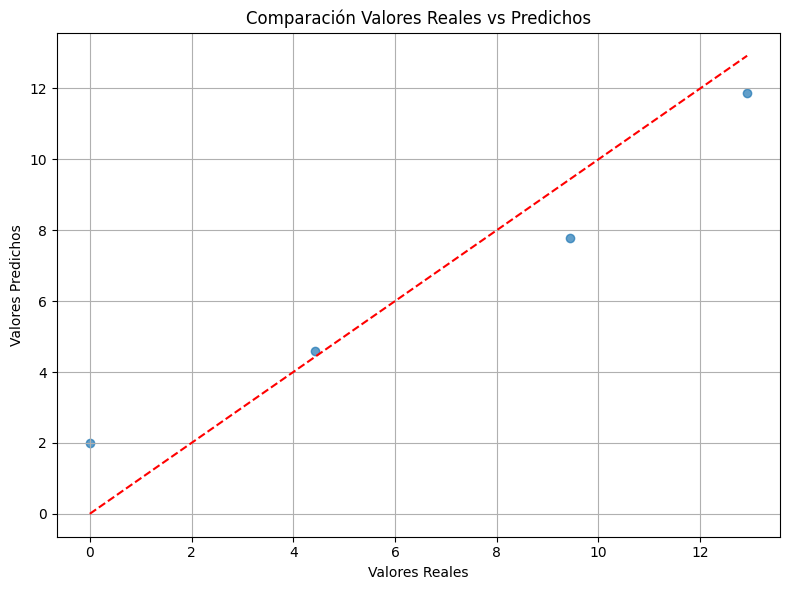

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
# GridSearch
param_grid = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Mejor alpha: {grid_search.best_params_}")

# Predicción con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Gráfico de comparación
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
regressors = {} 
for name, df in work_dfs.items():
    grouped = df.set_index("Crop_Year")

    X_train, X_test, y_train, y_test = train_test_split(grouped.drop("Yield", axis=1), grouped["Yield"], test_size=0.2, random_state=42)

    # Definir los modelos en un diccionario con sus parámetros
    pipelines = {
        'Ridge': Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())]),
        'RandomForest': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))]),
        'MLP': Pipeline([('scaler', StandardScaler()), ('regressor', MLPRegressor(max_iter=5000, random_state=42))])
    }

    param_grids = {
        'Ridge': {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]},
        'RandomForest': {'regressor__n_estimators': [50, 100,500], 'regressor__max_depth': [None, 5]},
        'MLP': {'regressor__hidden_layer_sizes': [(50,), (100,)], 'regressor__alpha': [0.0001, 0.001,0.01,0.1]}
    }

    # Ejecutar GridSearch para cada modelo
    mejores_resultados = {}

    for nombre, pipeline in pipelines.items():
        grid = GridSearchCV(pipeline, param_grids[nombre], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mejores_resultados[nombre] = {'BestParams': grid.best_params_, 'RMSE': rmse, 'Model': grid.best_estimator_}
        

    # Mostrar resultados
    for modelo, resultado in mejores_resultados.items():
        print(f"Para {name}")
        print(f"Modelo: {modelo}")
        print(f"Mejores Parámetros: {resultado['BestParams']}")
        print(f"RMSE: {resultado['RMSE']:.2f}")
        print("-" * 30)
    best_model = min(mejores_resultados, key=lambda k: mejores_resultados[k]['RMSE'])
    regressors[name] =  mejores_resultados.get(best_model).get("Model")


Para Barley
Modelo: Ridge
Mejores Parámetros: {'regressor__alpha': 0.01}
RMSE: 2.00
------------------------------
Para Barley
Modelo: RandomForest
Mejores Parámetros: {'regressor__max_depth': 5, 'regressor__n_estimators': 500}
RMSE: 2.29
------------------------------
Para Barley
Modelo: MLP
Mejores Parámetros: {'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (50,)}
RMSE: 2.20
------------------------------
Para Oilseeds_total
Modelo: Ridge
Mejores Parámetros: {'regressor__alpha': 1.0}
RMSE: 0.05
------------------------------
Para Oilseeds_total
Modelo: RandomForest
Mejores Parámetros: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
RMSE: 0.06
------------------------------
Para Oilseeds_total
Modelo: MLP
Mejores Parámetros: {'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (50,)}
RMSE: 0.13
------------------------------


c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Para Rice
Modelo: Ridge
Mejores Parámetros: {'regressor__alpha': 1.0}
RMSE: 5.21
------------------------------
Para Rice
Modelo: RandomForest
Mejores Parámetros: {'regressor__max_depth': None, 'regressor__n_estimators': 500}
RMSE: 6.69
------------------------------
Para Rice
Modelo: MLP
Mejores Parámetros: {'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (100,)}
RMSE: 6.18
------------------------------
Para Sweet_potato
Modelo: Ridge
Mejores Parámetros: {'regressor__alpha': 1.0}
RMSE: 1.99
------------------------------
Para Sweet_potato
Modelo: RandomForest
Mejores Parámetros: {'regressor__max_depth': None, 'regressor__n_estimators': 500}
RMSE: 3.25
------------------------------
Para Sweet_potato
Modelo: MLP
Mejores Parámetros: {'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (50,)}
RMSE: 1.37
------------------------------
Para Tapioca
Modelo: Ridge
Mejores Parámetros: {'regressor__alpha': 1.0}
RMSE: 1.41
------------------------------
Para Tapioca
Modelo: Ran

### Algunas predicciones

In [ ]:
regressors.get("Barley").predict([[940.700000, 188014.620000, 356.700000]])

c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.3363072])

In [20]:
regressors.get("Sweet_potato").predict([[940.700000, 188014.620000, 356.700000]])

c:\Users\masou\Dev\FLACSOCienciaDeDatos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.94695069])